In [1]:
import warnings
warnings.simplefilter("ignore",category=DeprecationWarning)

In [2]:
import time
import pandas as pd
import numpy as np
import qiskit
import matplotlib.pyplot as plt
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit

In [3]:
flat_train = pd.read_csv('flatPrices/train.csv')
flat_test = pd.read_csv('flatPrices/test.csv')

In [4]:
flat_train = flat_train.iloc[:-7000]
flat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 entries, 0 to 5005
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5006 non-null   float64
 1   town          5006 non-null   int64  
 2   flat_type     5006 non-null   int64  
 3   block         5006 non-null   int64  
 4   latitude      5006 non-null   float64
 5   longitude     5006 non-null   float64
 6   area_sqm      5006 non-null   float64
 7   resale_price  5006 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 313.0 KB


In [5]:
#train_features = ['year','town','flat_type','block','latitude','longitude','area_sqm']

train_data = flat_train.drop(['resale_price'],axis=1)
train_labels = flat_train['resale_price']

test_data = flat_test.drop(['resale_price'],axis=1)
test_labels = flat_test['resale_price']

In [6]:
train_data

,year,town,flat_type,block,latitude,longitude,area_sqm
0,0.988619,3,3,80,1.350414,0.997673,0.377850
1,0.993568,11,3,1142,1.376256,0.999085,0.342020
2,0.991094,0,2,936,1.367239,0.998671,0.237785
3,0.989114,13,3,1127,1.351834,0.997470,0.335505
4,0.994062,12,4,55,1.338773,0.997566,0.390879
...,...,...,...,...,...,...,...
5001,0.985651,1,2,838,1.323792,0.999386,0.211726
5002,0.986640,3,4,504,1.349728,0.997765,0.394137
5003,0.984661,10,4,1675,1.307858,0.999039,0.446254
5004,0.991588,3,2,554,1.350585,0.997790,0.218241


In [7]:
train_data = train_data.to_numpy()
train_labels = train_labels.to_numpy()

In [8]:
np.shape(train_data)

(5006, 7)

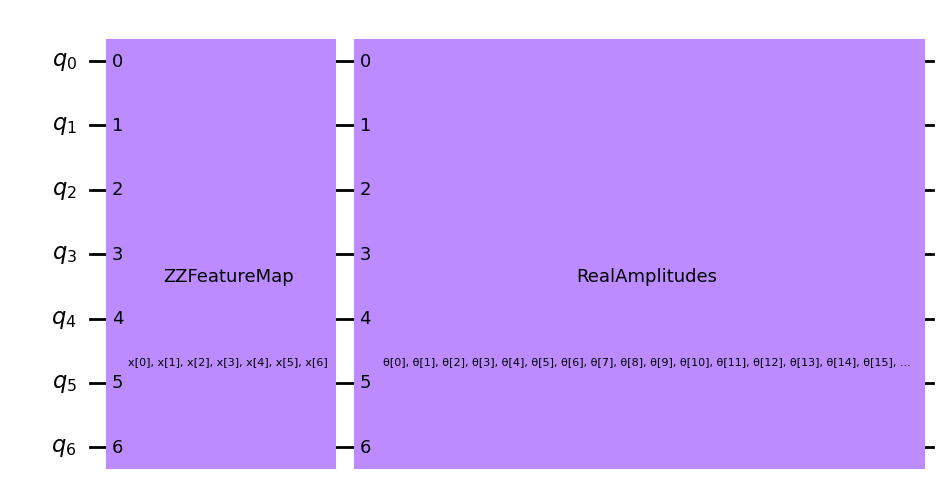

In [9]:
qc = QNNCircuit(num_qubits=7) #number of features
qc.draw('mpl')

In [10]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [11]:
from qiskit.primitives import Estimator
#estimator = Estimator()

In [12]:
#train_data = train_data.reshape(len(train_data),1)
#np.shape(train_data)

In [13]:
#backend = qiskit.Aer.get_backend('qasm_simulator')

In [14]:
from qiskit_ibm_runtime import Estimator, QiskitRuntimeService

service = QiskitRuntimeService(
     channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='84e47768480771b0f65f16b3f25447e5ab6b88d174cccb8271d1d0a3e4fdf3ce875e7f9f2612ad64f6f107644f49d8c6d9cd2619469de103753b4ae7556e703a'
)
backend = service.backend('ibm_lagos')
estimator = Estimator(backend=backend)

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='<IBM Quantum API key>')

In [15]:
regression_estimator_qnn = EstimatorQNN(circuit=qc,estimator=estimator)
regressor = NeuralNetworkRegressor(neural_network=regression_estimator_qnn,
                                   loss='squared_error',
                                   optimizer=L_BFGS_B(maxiter=1))

In [16]:
#train_data = train_data.flatten()
#train_data = train_data.reshape(len(train_data),1)

#train_labels = train_labels.flatten()
#train_labels = train_labels.reshape(len(train_data),1)

In [17]:
train_data

array([[ 0.9886195 ,  3.        ,  3.        , ...,  1.3504141 ,
         0.99767317,  0.37785016],
       [ 0.99356754, 11.        ,  3.        , ...,  1.3762561 ,
         0.99908505,  0.34201954],
       [ 0.99109352,  0.        ,  2.        , ...,  1.367239  ,
         0.99867132,  0.23778502],
       ...,
       [ 0.98466106, 10.        ,  4.        , ...,  1.30785825,
         0.99903928,  0.44625407],
       [ 0.99158832,  3.        ,  2.        , ...,  1.3505854 ,
         0.99778971,  0.21824104],
       [ 0.99010391,  5.        ,  3.        , ...,  1.3770244 ,
         0.99789067,  0.27361564]])

In [18]:
test_data = test_data.iloc[:-7000]
test_data

,year,town,flat_type,block,latitude,longitude,area_sqm
0,0.985156,0,2,117,1.371206,0.998604,0.218241
1,0.998021,26,3,1167,1.422329,0.998631,0.273616
2,0.993073,21,3,693,1.396191,0.999119,0.293160
3,0.989609,1,2,142,1.329465,0.999493,0.267101
4,0.985156,13,5,1075,1.353631,0.997477,0.482085
...,...,...,...,...,...,...,...
4991,0.988619,2,5,242,1.348270,0.998707,0.495114
4992,0.991588,26,2,2300,1.414105,0.998530,0.208469
4993,0.989114,23,4,95,1.345445,0.999650,0.397394
4994,0.990599,13,3,2421,1.343745,0.997135,0.342020


In [19]:
test_labels = test_labels.iloc[:-7000]
test_labels

0        37000.0
1       285000.0
2       260000.0
3       194000.0
4       180000.0
          ...   
4991    605000.0
4992    128000.0
4993    353000.0
4994    171000.0
4995    575000.0
Name: resale_price, Length: 4996, dtype: float64

In [ ]:
objective_func_vals = []

start_time = time.time()
regressor.fit(train_data,train_labels)
elapsed_time = time.time() - start_time

In [ ]:
print(f"Training time: {round(elapsed_time)} seconds")

In [ ]:
predicted_test_labels = regressor.predict(test_data)
plt.scatter(test_labels,predicted_test_labels)

In [ ]:
regressor.score(test_data,test_labels)

### Using VQR

In [ ]:
feature_map = ZZFeatureMap(7,reps=1,insert_barriers='True')
ansatz = RealAmplitudes(7,resp=1)

In [ ]:
vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=5))

In [ ]:
vqr.fit(train_data,train_labels)

In [ ]:
vqr.score(train_data,train_labels)

In [ ]:
predicted_vqr_test_labels = vqr.predict(test_data)

In [ ]:
plt.plot(test_labels,predicted_vqr_test_labels)